In [4]:
import pickle
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
multi_skill = pd.read_csv('/mnt/qb/work/mlcolab/hzhou52/kt/junyi/single_user_multi_skill/interactions_200.csv',sep='\t')
# multi_skill[44:90]

In [98]:
single_skill = pd.read_csv('/mnt/qb/work/mlcolab/hzhou52/kt/junyi/single_user_single_skill/interactions_200.csv', sep='\t')
# single_skill[739189:739199]

In [ ]:


train_split_0.4
HLR accuracy:0.7716,auc:0.5919,f1:0.8648,precision:0.8619,recall:0.8678
OU accuracy:0.8581,auc:0.8021,f1:0.9206,precision:0.8927,recall:0.9502
0.3
accuracy:0.7716,auc:0.5919,f1:0.8648,precision:0.8619,recall:0.8678
accuracy:0.8540,auc:0.7988,f1:0.9179,precision:0.8945,recall:0.9425
0.2
ccuracy:0.7066,auc:0.5905,f1:0.8145,precision:0.8706,recall:0.7652
accuracy:0.8476,auc:0.7891,f1:0.9137,precision:0.8953,recall:0.9329
0.1
accuracy:0.6998,auc:0.4873,f1:0.8091,precision:0.8705,recall:0.7558
accuracy:0.8307,auc:0.7979,f1:0.9011,precision:0.9109,recall:0.8916

Text(0, 0.5, 'F1 Score')

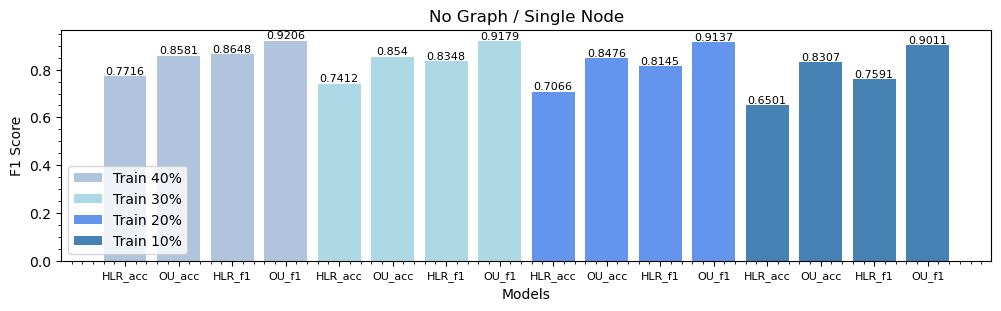

In [216]:
# comparison of OU and HLR
# final results comparison
fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()
tick_label = ['HLR_acc', 'OU_acc', 'HLR_f1', 'OU_f1']

# Save the chart so we can loop through the bars below.
bars1 = ax.bar(
    x=np.arange(0,4),
    height=[0.7716, 0.8581, 0.8648, 0.9206],
    tick_label=tick_label,
    color='lightsteelblue',
    width=0.8
)
ax.bar_label(bars1, size=8)


bars2= ax.bar(
    x=np.arange(4,8),
    height=[0.7412, 0.8540, 0.8348, 0.9179],
    tick_label=tick_label,
    color='lightblue',
    width=0.8
)
ax.bar_label(bars2, size=8)

bars3= ax.bar(
    x=np.arange(8,12),
    height=[0.7066, 0.8476, 0.8145, 0.9137],
    tick_label=tick_label,
    color='cornflowerblue',
    width=0.8
)
ax.bar_label(bars3, size=8)

bars4= ax.bar(
    x=np.arange(12,16),
    height=[0.6501, 0.8307, 0.7591, 0.9011],
    tick_label=tick_label,
    color='steelblue',
    width=0.8
)
ax.bar_label(bars4, size=8)

ax.legend((bars1[0], bars2[0], bars3[0], bars4[0]), 
          ('Train 40%', 'Train 30%', 'Train 20%', 'Train 10%'),
         loc = 'lower left')
name = tick_label * 4

ax.set_xticks(np.arange(0,16), name, size=8)
# ax.set_xticks(name)
# ax.set_xticklabels(name, minor=True)
# plt.setp(ax.get_xticklabels(), rotation=0)

# giving title to the plot
plt.title("No Graph / Single Node")

# giving X and Y labels
plt.xlabel("Models")
plt.ylabel("F1 Score")






In [208]:
no_graph_single_user_single_node = { # HLR PPE VanillaOU 
    'model_name': ['HLR', 'PPE', 'OU'],
    'accuracy': [0.6030, 0.7437, 0.8588],
    'f1': [0.7140, 0.8481, 0.9205],
    'precision': [0.9482, 0.8707, 0.8980],
    'recall': [0.5725, 0.8265, 0.9441],
}

no_graph_multi_user_single_node_split_time = { # HLR PPE VanillaOU ArmotizedSSM 
    'model_name': ['HLR', 'PPE', 'OU', 'HSSM'],
    'accuracy': [0.8096, 0.0, 0.8661, 0.8176],
    'f1': [0.8918, 0.0, 0.9280, 0.8982],
    'precision': [0.8776, 0.0, 0.8679, 0.8688],
    'recall': [0.9064, 0.0, 0.9972, 0.9296],
}

no_graph_multi_user_single_node_split_learner = { # HLR PPE VanillaOU ArmotizedSSM 
    'model_name': ['HLR', 'PPE', 'OU', 'HSSM'],
    'accuracy': [0.7973, 0.0, 0.8497, 0.0],
    'f1': [0.8832, 0.0, 0.9186, 0.0],
    'precision': [0.8640, 0.0, 0.8503, 0.0],
    'recall': [0.9032, 0.0, 0.9987, 0.0],
}
graph_single_user_single_node = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7014, 0.0, 0.8413, 0.0, 0.8416, 0.0], 
    'f1': [0.8100, 0.0, 0.9131, 0.0, 0.9140, 0.0], 
    'precision': [0.8720, 0.0, 0.8469, 0.0, 0.8475, 0.0], 
    'recall': [0.7562, 0.0, 0.9904, 0.0, 0.9918, 0.0], 
}
graph_multi_user_single_node_split_time = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7716, 0.0, 0.8430, 0.8437, 0.8437, 0.0], 
    'f1': [0.8648, 0.0, 0.9146, 0.9151, 0.9154, 0.0], 
    'precision': [0.8619, 0.0, 0.8437, 0.8434, 0.8439, 0.0], 
    'recall': [0.8678, 0.0, 0.9985, 1.00, 1.00, 0.0],
}
graph_multi_user_single_node_split_learner = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7684, 0.0, 0.8584, 0.8588, 0.8588, 0.0], 
    'f1': [0.8625, 0.0, 0.9237, 0.9239, 0.9247, 0.0], 
    'precision': [0.8783, 0.0, 0.8586, 0.8586, 0.8600, 0.0], 
    'recall': [0.8473, 0.0, 0.9994, 1.00, 1.00, 0.0],
}


Text(0, 0.5, 'Scores')

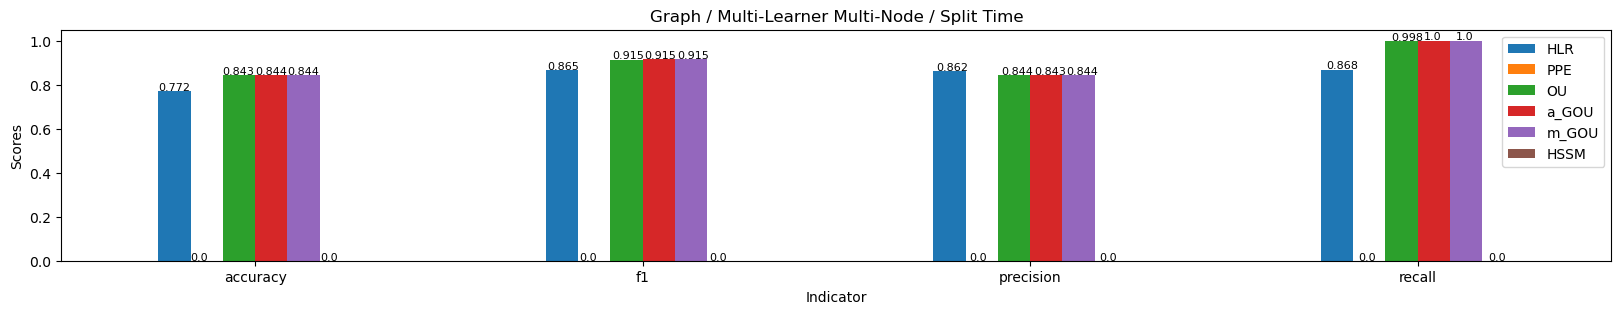

In [201]:
########## exp5
graph_multi_user_single_node_split_time = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7716, 0.0, 0.8430, 0.8437, 0.8437, 0.0], 
    'f1': [0.8648, 0.0, 0.9146, 0.9151, 0.9154, 0.0], 
    'precision': [0.8619, 0.0, 0.8437, 0.8434, 0.8439, 0.0], 
    'recall': [0.8678, 0.0, 0.9985, 1.00, 1.00, 0.0],
}
exp5 = pd.DataFrame(
    np.array([[0.7716, 0.0, 0.8430, 0.8437, 0.8437, 0.0], 
              [0.8648, 0.0, 0.9146, 0.9151, 0.9154, 0.0], 
              [0.8619, 0.0, 0.8437, 0.8434, 0.8439, 0.0], 
              [0.8678, 0.0, 0.9985, 1.00, 1.00, 0.0], ]
    ),
    columns=graph_multi_user_single_node_split_time['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)

# final results comparison
# fig, ax = plt.subplots(figsize=(12, 3))
# ax.minorticks_on()
ax = exp5.plot(kind='bar', figsize=(20,3), rot = 0)

i = 0
for p in ax.patches:
    # print((i%6)*0.5)
    ax.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, (p.get_height())*1.005), size=8)
    i = i+1
ax.set_title("Graph / Multi-Learner Multi-Node / Split Time")

# giving X and Y labels
ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")

Text(0, 0.5, 'Scores')

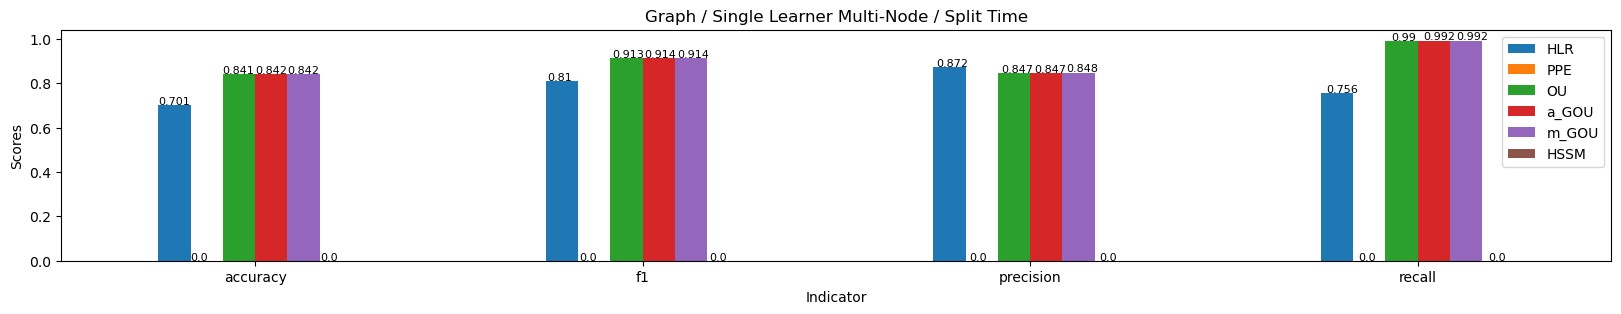

In [200]:
########## exp4
graph_single_user_single_node = {
    'model_name': ['HLR', 'PPE', 'OU', 'a_GOU', 'm_GOU', 'HSSM'],
    'accuracy': [0.7014, 0.0, 0.8413, 0.0, 0.8416, 0.0], 
    'f1': [0.8100, 0.0, 0.9131, 0.0, 0.9140, 0.0], 
    'precision': [0.8720, 0.0, 0.8469, 0.0, 0.8475, 0.0], 
    'recall': [0.7562, 0.0, 0.9904, 0.0, 0.9918, 0.0], 
}
exp4 = pd.DataFrame(
    np.array([[0.7014, 0.0, 0.8413, 0.8416, 0.8419, 0.0], 
              [0.8100, 0.0, 0.9131, 0.9135, 0.9140, 0.0], 
              [0.8720, 0.0, 0.8469, 0.8467, 0.8475, 0.0], 
              [0.7562, 0.0, 0.9904, 0.9916, 0.9918, 0.0], ]
    ),
    columns=graph_single_user_single_node['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)

# final results comparison
# fig, ax = plt.subplots(figsize=(12, 3))
# ax.minorticks_on()
ax = exp4.plot(kind='bar', figsize=(20,3), rot = 0)

i = 0
for p in ax.patches:
    # print((i%6)*0.5)
    ax.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, (p.get_height())*1.005), size=8)
    i = i+1
ax.set_title("Graph / Single Learner Multi-Node / Split Time")

# giving X and Y labels
ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")

In [164]:
0%6

0

Text(0, 0.5, 'Scores')

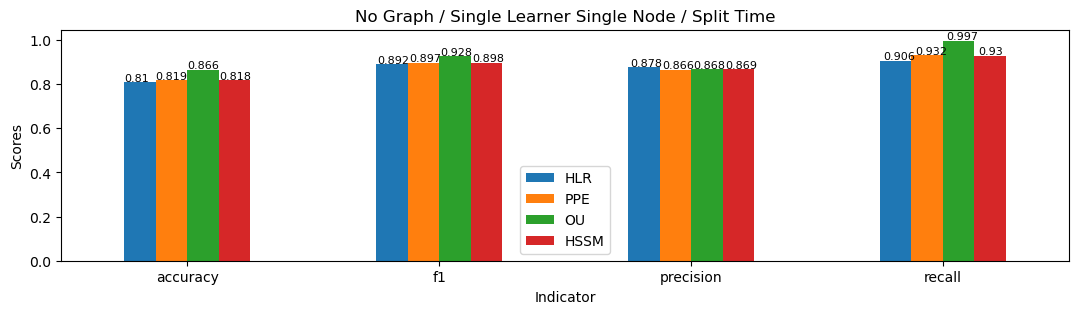

In [144]:
########## exp2
no_graph_multi_user_single_node_split_time = { # HLR PPE VanillaOU ArmotizedSSM 
    'model_name': ['HLR', 'PPE', 'OU', 'HSSM'],
    'accuracy': [0.8096, 0.8193, 0.8661, 0.8176],
    'f1': [0.8918, 0.8973, 0.9280, 0.8982],
    'precision': [0.8776, 0.8655, 0.8679, 0.8688],
    'recall': [0.9064, 0.9315, 0.9972, 0.9296],
}
exp2 = pd.DataFrame(
    np.array([[0.8096, 0.8193, 0.8661, 0.8176], 
              [0.8918, 0.8973, 0.9280, 0.8982], 
              [0.8776, 0.8655, 0.8679, 0.8688],
              [0.9064, 0.9315, 0.9972, 0.9296]]
    ),
    columns=no_graph_multi_user_single_node_split_time['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)

# final results comparison
# fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()
ax = exp2.plot(kind='bar', figsize=(13,3), rot = 0)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005), size=8)
ax.set_title("No Graph / Single Learner Single Node / Split Time")

# giving X and Y labels
ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")

Text(0, 0.5, 'Scores')

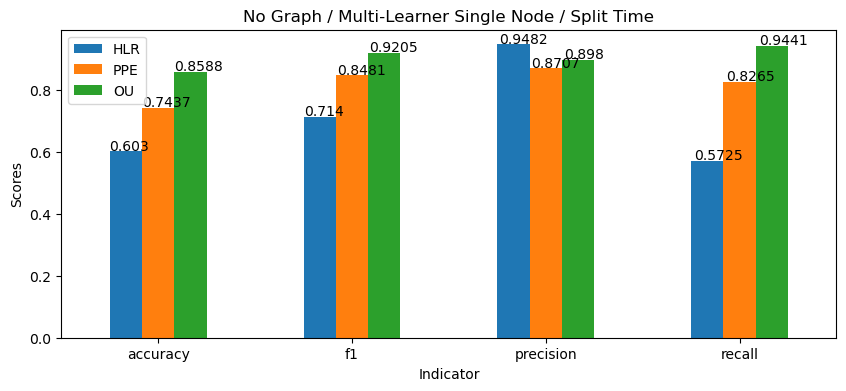

In [131]:
####### exp1
no_graph_single_user_single_node = { # HLR PPE VanillaOU 
    'model_name': ['HLR', 'PPE', 'OU'],
    'accuracy': [0.6030, 0.7437, 0.8588],
    'f1': [0.7140, 0.8481, 0.9205],
    'precision': [0.9482, 0.8707, 0.8980],
    'recall': [0.5725, 0.8265, 0.9441],
}
exp1 = pd.DataFrame(
    np.array([[0.6030, 0.7437, 0.8588], [0.7140, 0.8481, 0.9205],[0.9482, 0.8707, 0.8980],[0.5725, 0.8265, 0.9441]]
    ),
    columns=no_graph_single_user_single_node['model_name'], 
    index=['accuracy', 'f1', 'precision', 'recall']
)

# final results comparison
# fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()
ax = exp1.plot(kind='bar', figsize=(10,4), rot = 0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size=10)
ax.set_title("No Graph / Multi-Learner Single Node")

# giving X and Y labels
ax.set_xlabel("Indicator")
ax.set_ylabel("Scores")

Text(0, 0.5, 'Scores')

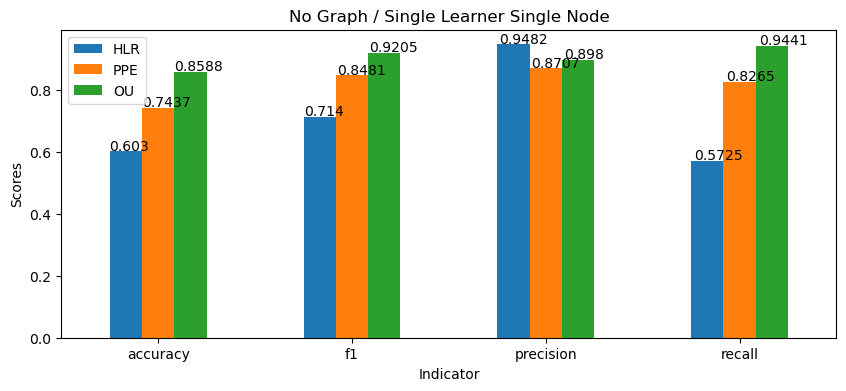

Text(0, 0.5, 'F1 Score')

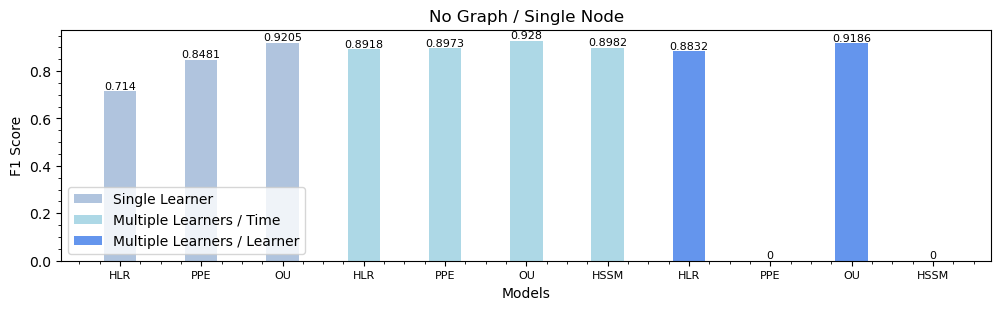

In [202]:
# final results comparison
fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()


# Save the chart so we can loop through the bars below.
bars1 = ax.bar(
    x=np.arange(0,6,2),
    height=no_graph_single_user_single_node['f1'],
    tick_label=no_graph_single_user_single_node['model_name'],
    color='lightsteelblue',
    width=0.8
)
ax.bar_label(bars1, size=8)


bars2= ax.bar(
    x=np.arange(6, 14, 2),
    height=no_graph_multi_user_single_node_split_time['f1'],
    tick_label=no_graph_multi_user_single_node_split_time['model_name'],
    color='lightblue',
    width=0.8
)
ax.bar_label(bars2, size=8)


bars3= ax.bar(
    x=np.arange(14, 22, 2),
    height=no_graph_multi_user_single_node_split_learner['f1'],
    label=no_graph_multi_user_single_node_split_learner['model_name'],
    color='cornflowerblue',
    width=0.8
)
ax.bar_label(bars3, size=8)



ax.legend((bars1[0], bars2[0], bars3[0]), 
          ('Single Learner', 'Multiple Learners / Time', 'Multiple Learners / Learner'),
         loc = 'lower left')
name = no_graph_single_user_single_node['model_name'] + \
                no_graph_multi_user_single_node_split_time['model_name'] + \
                no_graph_multi_user_single_node_split_learner['model_name']

ax.set_xticks(np.arange(0,22,2), name, size=8)
# ax.set_xticks(name)
# ax.set_xticklabels(name, minor=True)
# plt.setp(ax.get_xticklabels(), rotation=0)

# giving title to the plot
plt.title("No Graph / Single Node")

# giving X and Y labels
plt.xlabel("Models")
plt.ylabel("F1 Score")


Text(0, 0.5, 'F1 Score')

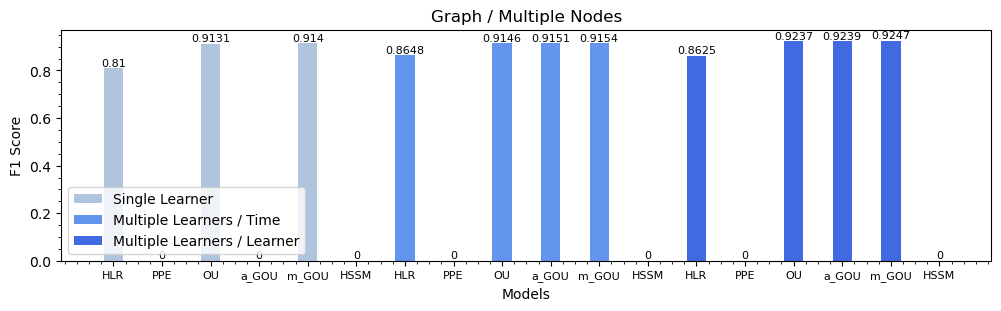

In [209]:
# final results comparison
fig, ax = plt.subplots(figsize=(12, 3))
ax.minorticks_on()


# Save the chart so we can loop through the bars below.
bars1 = ax.bar(
    x=np.arange(0,12,2),
    height=graph_single_user_single_node['f1'],
    tick_label=graph_single_user_single_node['model_name'],
    color='lightsteelblue',
    width=0.8
)
ax.bar_label(bars1, size=8)


bars2= ax.bar(
    x=np.arange(12, 24, 2),
    height=graph_multi_user_single_node_split_time['f1'],
    tick_label=graph_multi_user_single_node_split_time['model_name'],
    color='cornflowerblue',
    width=0.8
)
ax.bar_label(bars2, size=8)


bars3= ax.bar(
    x=np.arange(24, 36, 2),
    height=graph_multi_user_single_node_split_learner['f1'],
    label=graph_multi_user_single_node_split_learner['model_name'],
    color='royalblue',
    width=0.8
)
ax.bar_label(bars3, size=8)



ax.legend((bars1[0], bars2[0], bars3[0]), 
          ('Single Learner', 'Multiple Learners / Time', 'Multiple Learners / Learner'),
         loc = 'lower left')
name = graph_single_user_single_node['model_name'] + \
                graph_multi_user_single_node_split_time['model_name'] + \
                graph_multi_user_single_node_split_learner['model_name']

ax.set_xticks(np.arange(0,36,2), name, size=8)
# ax.set_xticks(name)
# ax.set_xticklabels(name, minor=True)
# plt.setp(ax.get_xticklabels(), rotation=0)

# giving title to the plot
plt.title("Graph / Multiple Nodes")
     
# giving X and Y labels
plt.xlabel("Models")
plt.ylabel("F1 Score")


Text(0, 0.5, 'Accuracy')

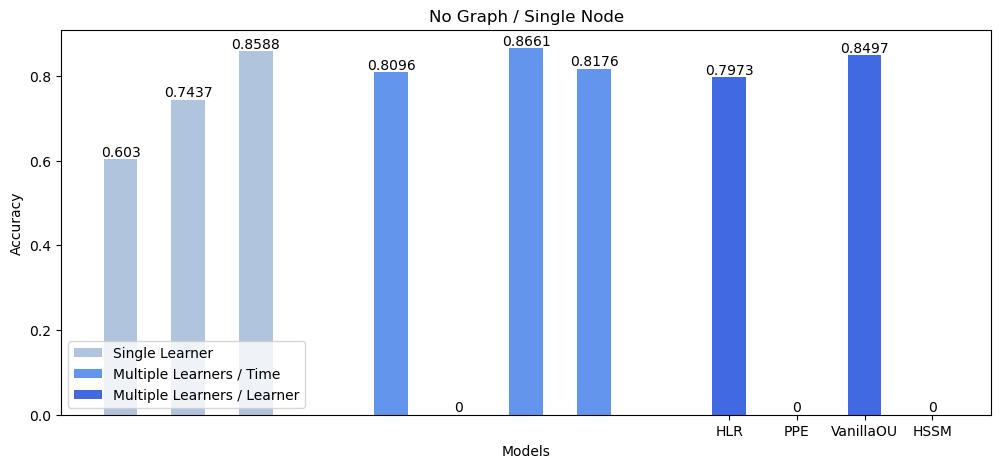

In [54]:
# final results comparison
fig, ax = plt.subplots(figsize=(12, 5))
# fig = plt.figure()

bars1 = ax.bar(
    x=np.arange(3),
    height=no_graph_single_user_single_node['accuracy'],
    tick_label=no_graph_single_user_single_node['model_name'],
    color='lightsteelblue',
    width=0.5
)


bars2= ax.bar(
    x=np.arange(4, 8),
    height=no_graph_multi_user_single_node_split_time['accuracy'],
    tick_label=no_graph_multi_user_single_node_split_time['model_name'],
    color='cornflowerblue',
    width=0.5
)


bars3= ax.bar(
    x=np.arange(9, 13),
    height=no_graph_multi_user_single_node_split_learner['accuracy'],
    tick_label=no_graph_multi_user_single_node_split_learner['model_name'],
    color='royalblue',
    width=0.5
)

ax.bar_label(bars1)
ax.bar_label(bars2)
ax.bar_label(bars3)


ax.legend((bars1[0], bars2[0], bars3[0]), 
          ('Single Learner', 'Multiple Learners / Time', 'Multiple Learners / Learner'),
         loc = 'lower left')
# giving title to the plot
plt.title("No Graph / Single Node")
     
# giving X and Y labels
plt.xlabel("Models")
plt.ylabel("Accuracy")


In [204]:
# 1exp_ngms/AmortizeHSSM
with open('model_dict.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [205]:
loaded_dict.keys()

dict_keys(['pred_y', 'pred_z', 'pred_s', 'mean_s', 'var_s', 'mean_z', 'var_z'])

In [206]:
loaded_dict['pred_s'].shape

torch.Size([50, 3696, 1, 3])

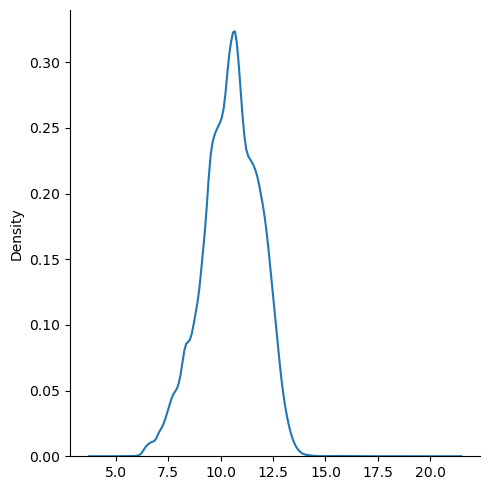

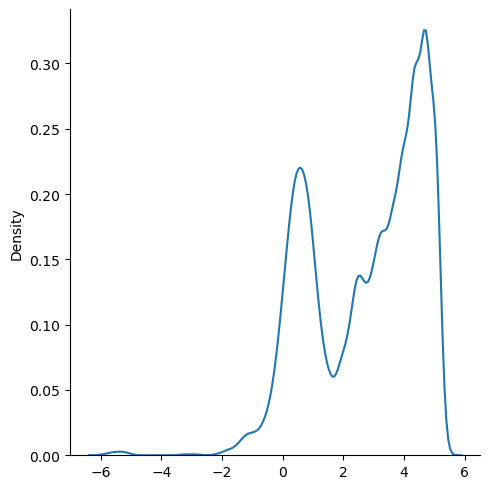

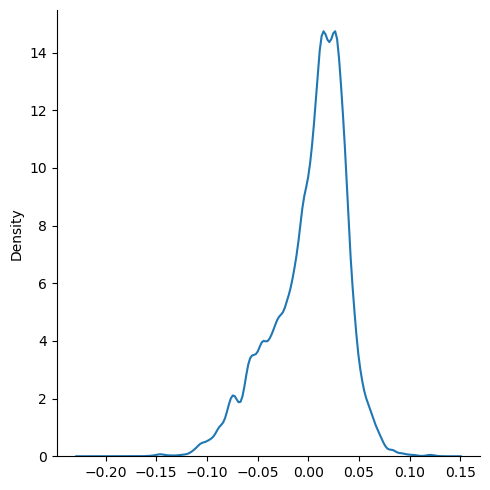

In [207]:
speed_hssm = loaded_dict['pred_s'][..., 0].reshape(-1).detach().cpu().numpy()
sns.displot(speed_hssm, kind='kde')

mean_hssm = loaded_dict['pred_s'][..., 1].reshape(-1).detach().cpu().numpy()
sns.displot(mean_hssm, kind='kde')

vola_hssm = loaded_dict['pred_s'][..., 2].reshape(-1).detach().cpu().numpy()
sns.displot(vola_hssm, kind='kde')

In [52]:
pred_y = loaded_dict['pred_y'].detach().cpu().numpy()
user_50 = pred_y[:, 50]
flat_pred_y = np.reshape(pred_y, (-1, 200, 1))

In [80]:
pred_y[:, 3059]

array([[[0.5000283 ],
        [0.9546072 ],
        [0.95423245],
        ...,
        [0.9544027 ],
        [0.9546435 ],
        [0.9543254 ]],

       [[0.4997036 ],
        [0.95541734],
        [0.95542896],
        ...,
        [0.9552552 ],
        [0.95545805],
        [0.95512086]],

       [[0.50088507],
        [0.9542987 ],
        [0.95397156],
        ...,
        [0.9539423 ],
        [0.9540854 ],
        [0.9541908 ]],

       ...,

       [[0.5003016 ],
        [0.9541067 ],
        [0.95426375],
        ...,
        [0.9538568 ],
        [0.9538824 ],
        [0.9539039 ]],

       [[0.49901062],
        [0.9551612 ],
        [0.95518637],
        ...,
        [0.95515895],
        [0.95523846],
        [0.9550273 ]],

       [[0.5000956 ],
        [0.95461994],
        [0.95448554],
        ...,
        [0.95459396],
        [0.95475256],
        [0.9542683 ]]], dtype=float32)

In [78]:
152912/50

3058.24

In [77]:
np.min(flat_pred_y[:,2:])

0.0025595387

In [76]:
np.where(flat_pred_y[:,1:] == np.min(flat_pred_y[:,1:]))

(array([152912]), array([141]), array([0]))

In [73]:
flat_pred_y[:,1:].shape

(184800, 199, 1)

In [71]:
pred_y.shape

(50, 3696, 200, 1)

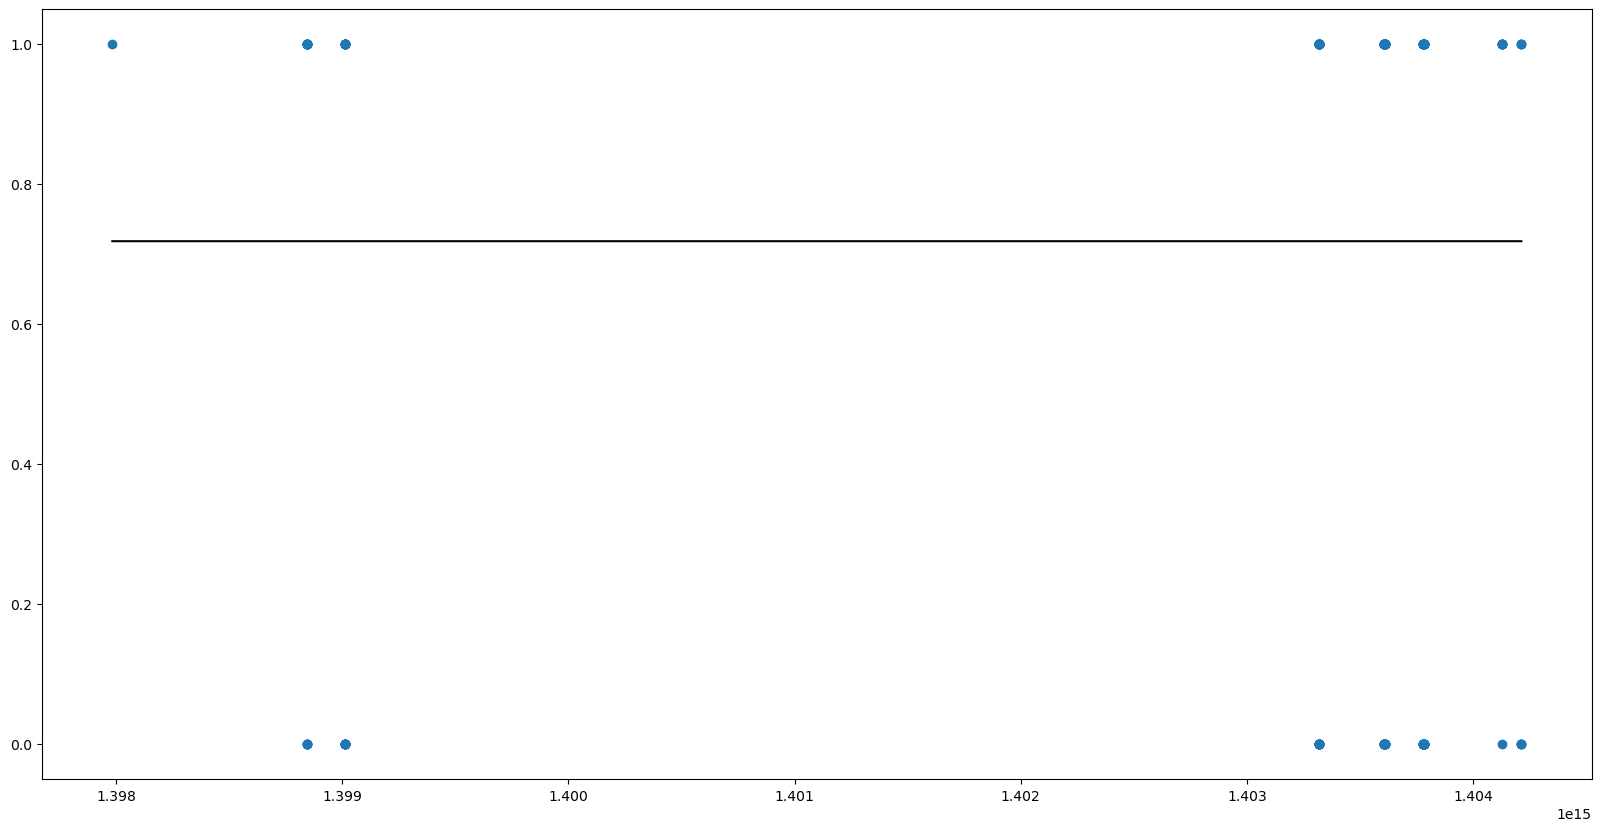

In [65]:
import matplotlib.pyplot as plt

user_id = 3695

time = corpus.user_seq_df.iloc[user_id]['time_seq'][1:]
errorbar = np.std(pred_y[:, user_id], 0)[1:,0]
y = np.mean(pred_y[:, user_id], 0)[1:,0]

plt.figure(figsize=(20,10))
plt.plot(time, y, 'k-')
plt.scatter(time, corpus.user_seq_df.iloc[user_id]['correct_seq'][1:])
plt.fill_between(time, y-errorbar, y+errorbar)
plt.ylim(-0.05, 1.05)


plt.show()

In [41]:
time = corpus.user_seq_df.iloc[50]['time_seq']
len(time)

200

In [78]:
import pickle
corpus_path = '/mnt/qb/work/mlcolab/hzhou52/kt/junyi/single_user_single_skill/Corpus_200.pkl'
with open(corpus_path, 'rb') as f:
    corpus = pickle.load(f)
# corpus.user_seq_df

ModuleNotFoundError: No module named 'data'

In [79]:
import torch
import numpy as np
import seaborn as sns

model_file = '/mnt/qb/work/mlcolab/hzhou52/kt/logs/0exp_ngss/OU/junyi/single_user_single_skill/2023-03-09T10:41:38.685090__overfit_0_epoch_100/Model/Model_76.pt'
state = torch.load(model_file)

In [16]:
speed = state['mean_rev_speed'].cpu().numpy()
mean = state['mean_rev_level'].cpu().numpy()
vola = state['vola'].cpu().numpy()

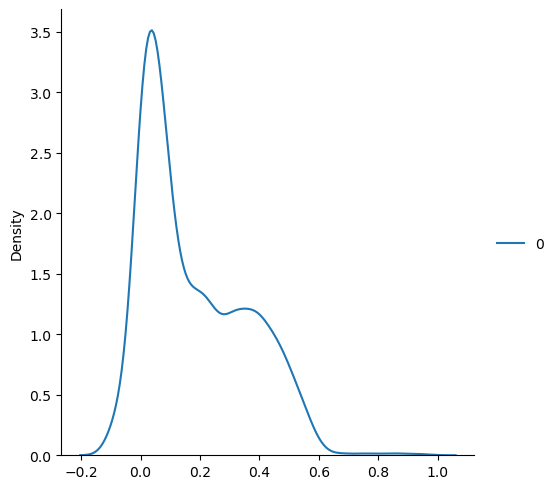

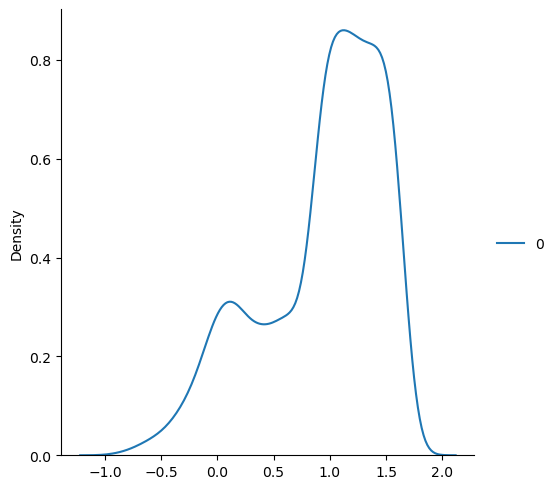

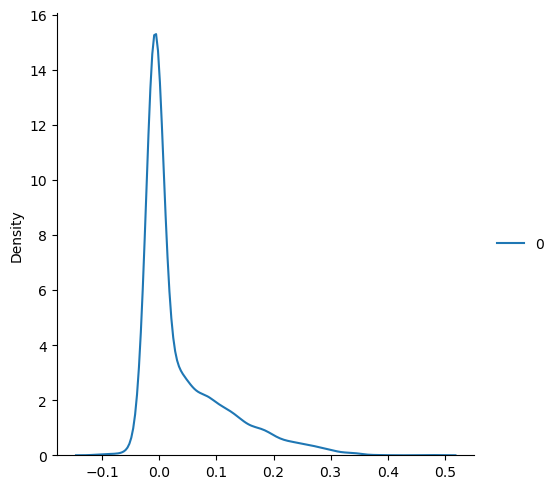

In [18]:
sns.displot(speed, kind="kde")
sns.displot(mean, kind='kde')
sns.displot(vola, kind='kde')

In [19]:
model_file = '/mnt/qb/work/mlcolab/hzhou52/kt/logs/2exp_gsm/VanillaOU/junyi/single_user_multi_skill/2023-03-13T15:56:49.662145__overfit_0/Model/Model_70.pt'
state = torch.load(model_file)

In [22]:
speed = state['mean_rev_speed'].cpu().numpy()[:,0]
mean = state['mean_rev_level'].cpu().numpy()[:,0]
vola = state['vola'].cpu().numpy()[:,0]

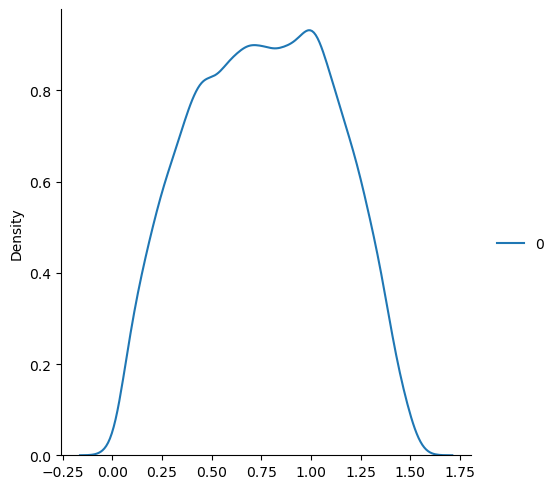

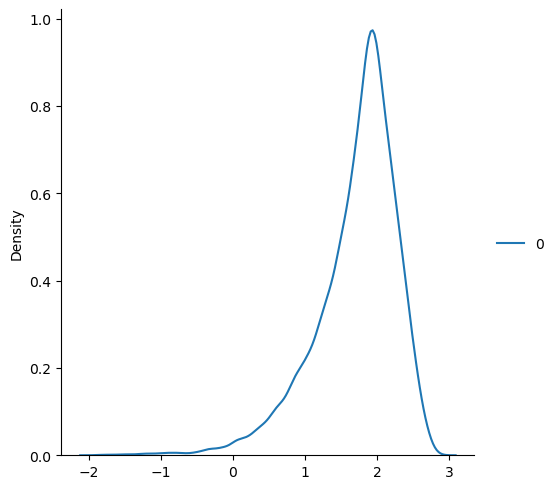

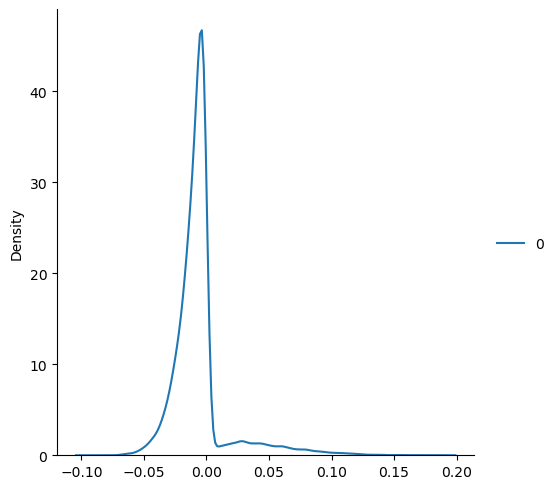

In [23]:
sns.displot(speed, kind="kde")
sns.displot(mean, kind='kde')
sns.displot(vola, kind='kde')

In [24]:
model_file = '/mnt/qb/work/mlcolab/hzhou52/kt/logs/2exp_gsm/GraphOU/2023-03-13T17:14:53.108027__overfit_0_mean_graph/Model/Model_40.pt'
state = torch.load(model_file)

In [30]:
speed = state['mean_rev_speed'].cpu().numpy()[:,0]
mean = state['mean_rev_level'].cpu().numpy()[:,0]
vola = state['vola'].cpu().numpy()[:,0]
gamma = state['gamma'].cpu().numpy()[:, 0]

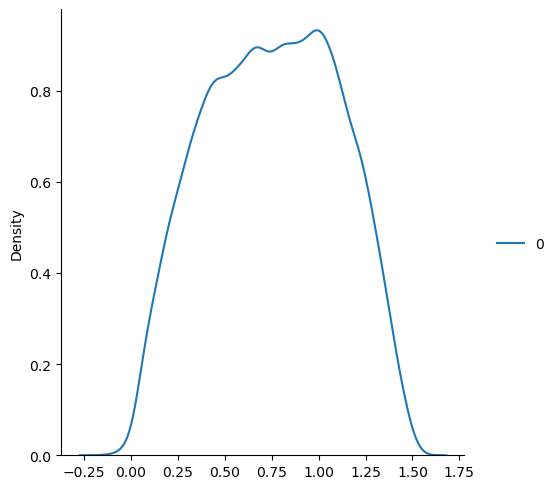

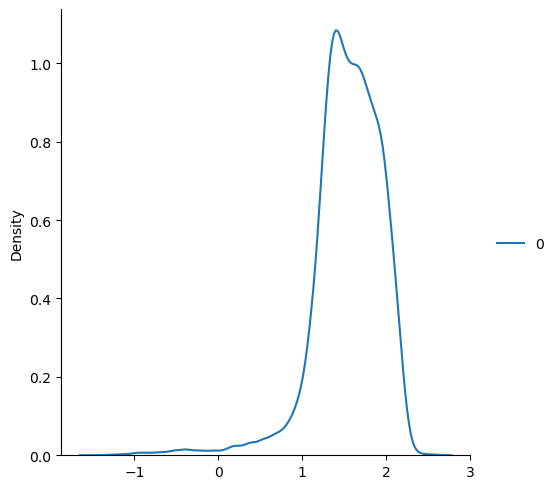

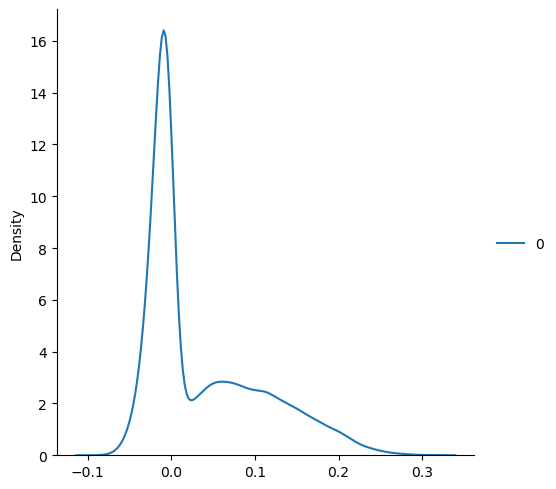

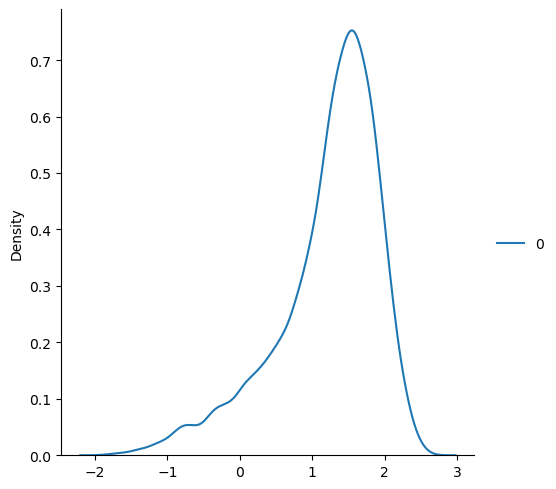

In [31]:
sns.displot(speed, kind="kde")
sns.displot(mean, kind='kde')
sns.displot(vola, kind='kde')
sns.displot(gamma, kind='kde')